In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from bootstrap_function import perform_bootstrap
from scipy.stats import ks_2samp

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

sns.set_theme()
sns.set_context("talk")

In [2]:
df = pd.read_csv('../master_df_3.csv')
df = df.drop(df.columns[0], axis=1)
df

,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line
0,PRF5_B3_pickup,Track_0,0,12,0,0,0,0,0,11,...,29.000,1.000,10.000,9.781,0.093,0.123,0.059,0.100,0.017,PRF5
1,PRF5_B3_pickup,Track_1,1,10,0,0,0,0,0,9,...,2.000,0.000,1.000,0.928,0.087,0.116,0.040,0.094,0.023,PRF5
2,PRF5_B3_pickup,Track_2,2,3,0,0,0,0,0,2,...,4.000,2.000,4.000,1.414,0.067,0.075,0.056,0.070,0.008,PRF5
3,PRF5_B3_pickup,Track_3,3,7,0,0,0,0,0,6,...,12.837,2.459,6.725,3.562,0.096,0.100,0.094,0.096,0.002,PRF5
4,PRF5_B3_pickup,Track_4,4,3,0,0,0,0,0,2,...,15.758,7.837,15.758,5.601,0.075,0.080,0.071,0.073,0.004,PRF5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28951,JHH4 C2 Pickup,Track_562,171,28,1,2,0,0,0,29,...,12.144,1.261,3.776,2.951,20.357,30.860,0.938,23.666,8.401,JHH4
28952,JHH4 C2 Pickup,Track_563,172,24,1,2,0,0,0,25,...,26.095,0.513,6.390,7.976,11.447,22.958,0.681,11.079,6.412,JHH4
28953,JHH4 C2 Pickup,Track_571,180,17,0,0,0,0,0,16,...,39.380,0.910,10.010,9.622,13.101,20.086,8.683,10.978,4.414,JHH4
28954,JHH4 C2 Pickup,Track_578,187,7,0,0,0,0,0,6,...,32.209,8.133,15.220,9.544,1.150,1.464,0.510,1.325,0.317,JHH4


In [3]:
df.cell_line.unique()

array(['PRF5', 'JHH4', 'JHH6', 'JHH7', 'JHH7_2.5uM', 'JHH6_2.5uM',
       'JHH7_0uM', 'JHH6_0uM', 'JHH7_1uM', 'JHH6_1uM', 'Huh7', 'Kami41'],
      dtype=object)

In [4]:
non_treatment_lines = ['PRF5', 'JHH4', 'JHH6', 'JHH7', 'Huh7', 'Kami41']
non_treatment_df = df[df.cell_line.isin(non_treatment_lines)]
non_treatment_df = non_treatment_df.reset_index(drop=True)
non_treatment_df

,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line
0,PRF5_B3_pickup,Track_0,0,12,0,0,0,0,0,11,...,29.000,1.000,10.000,9.781,0.093,0.123,0.059,0.100,0.017,PRF5
1,PRF5_B3_pickup,Track_1,1,10,0,0,0,0,0,9,...,2.000,0.000,1.000,0.928,0.087,0.116,0.040,0.094,0.023,PRF5
2,PRF5_B3_pickup,Track_2,2,3,0,0,0,0,0,2,...,4.000,2.000,4.000,1.414,0.067,0.075,0.056,0.070,0.008,PRF5
3,PRF5_B3_pickup,Track_3,3,7,0,0,0,0,0,6,...,12.837,2.459,6.725,3.562,0.096,0.100,0.094,0.096,0.002,PRF5
4,PRF5_B3_pickup,Track_4,4,3,0,0,0,0,0,2,...,15.758,7.837,15.758,5.601,0.075,0.080,0.071,0.073,0.004,PRF5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19636,JHH4 C2 Pickup,Track_562,171,28,1,2,0,0,0,29,...,12.144,1.261,3.776,2.951,20.357,30.860,0.938,23.666,8.401,JHH4
19637,JHH4 C2 Pickup,Track_563,172,24,1,2,0,0,0,25,...,26.095,0.513,6.390,7.976,11.447,22.958,0.681,11.079,6.412,JHH4
19638,JHH4 C2 Pickup,Track_571,180,17,0,0,0,0,0,16,...,39.380,0.910,10.010,9.622,13.101,20.086,8.683,10.978,4.414,JHH4
19639,JHH4 C2 Pickup,Track_578,187,7,0,0,0,0,0,6,...,32.209,8.133,15.220,9.544,1.150,1.464,0.510,1.325,0.317,JHH4


In [5]:
# modified boostrap function for use on all cell lines

def all_line_bootstrap(dataframe):
    cell_line_df = dataframe
    TRACK_MEAN_SPEED_df = cell_line_df[['TRACK_MEAN_SPEED', 'cell_line']]
    cell_line_list = TRACK_MEAN_SPEED_df.cell_line.unique()

    # perform loop to identify max length for all image series for this cell line
    max_length = 0
    for series in cell_line_list:
        series = TRACK_MEAN_SPEED_df[TRACK_MEAN_SPEED_df['cell_line'] == series]
        series_length = len(series)
        if series_length > max_length:
            max_length = series_length
        else:
            pass

    print('max_length: ', max_length)
    bootstrap_dict = {}

    # next, use the max length to bootstrap values for any series with fewer values than the max length
    for series in cell_line_list:
        series_values = TRACK_MEAN_SPEED_df[TRACK_MEAN_SPEED_df['cell_line'] == series]['TRACK_MEAN_SPEED']
        series_length = len(series_values)
        if series_length < max_length:
            x = np.random.choice(series_values, size=max_length, replace=True)
            bootstrap_dict[series] = x
        elif series_length == max_length:
            bootstrap_dict[series] = series_values
        else:
            print('Series length error')

#     print(bootstrap_dict.keys())
    return bootstrap_dict

In [6]:
bootstrap_dict = all_line_bootstrap(dataframe=non_treatment_df)

max_length:  7331


max_length:  7331


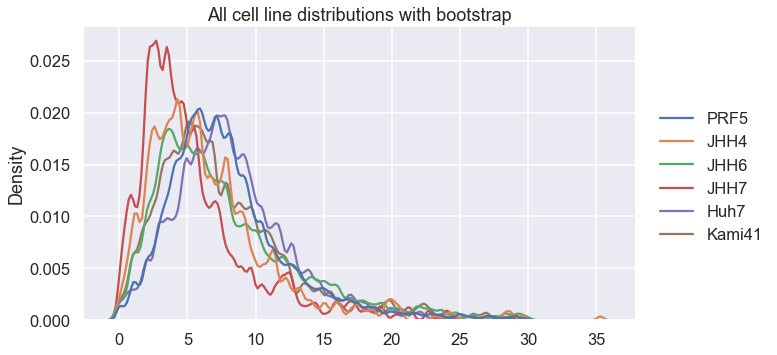

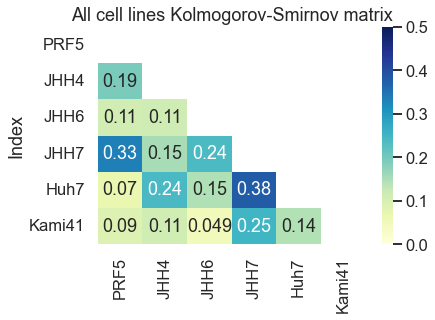

In [7]:
bootstrap_dict = all_line_bootstrap(dataframe=non_treatment_df)
bootstrap_df = pd.DataFrame.from_dict(bootstrap_dict)
bootstrap_df = bootstrap_df.reset_index(drop=True)
bootstrap_df

# calculate Kolmogorov-Smirnov
series_list = bootstrap_df.columns
ks_values = []
# calculate KS values
for i in range(len(series_list)):
    results_list = [series_list[i]]
    for j in range(len(series_list)):
        p = series_list[i]
        q = series_list[j]
        comparison = p + " x " + q
        p = bootstrap_df[p]
        q = bootstrap_df[q]
        ks_result = ks_2samp(p, q)[0]
        results_list.append(ks_result)

    ks_values.append(results_list)

# convert to dataframe
ks_df = pd.DataFrame(ks_values, columns = ['Index', series_list[0], series_list[1], series_list[2], 
                                        series_list[3], series_list[4], series_list[5]])
ks_df = ks_df.set_index('Index')
# plot distribution
sns.displot(bootstrap_df, kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='All cell line distributions with bootstrap')
# plt.savefig('./images/all_cell_lines_kde.png', dpi=200, bbox_inches='tight', pad_inches=0.1)
plt.show()

with sns.axes_style("white"):
    mask = np.zeros_like(ks_df)
    mask[np.triu_indices_from(mask)] = True    
    sns.heatmap(ks_df, annot=True, mask=mask, vmin=0, vmax=0.5, 
                cmap="YlGnBu").set(title='All cell lines Kolmogorov-Smirnov matrix')
    plt.savefig('./images/all_cell_lines_kde_ks_heatmap.png', dpi=200, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [14]:
# split into archetypes

archetype1_list = ['JHH4', 'JHH6']
archetype2_list = ['PRF5', 'JHH7', 'Huh7', 'Kami41']

archetype1_df = df[df.cell_line.isin(archetype1_list)]
archetype1_df = archetype1_df.reset_index(drop=True)
archetype1_df['archetype'] = 1
archetype1_df

,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line,archetype
0,JHH4_B2,Track_0,0,39,2,1,0,0,0,40,...,0.000,4.500,4.901,0.133,0.145,0.103,0.134,0.010,JHH4,1
1,JHH4_B2,Track_1,1,25,0,0,0,0,0,24,...,1.746,7.375,5.990,0.132,0.144,0.109,0.131,0.009,JHH4,1
2,JHH4_B2,Track_2,2,12,0,0,0,0,0,11,...,1.246,6.963,9.102,0.128,0.136,0.119,0.129,0.006,JHH4,1
3,JHH4_B2,Track_3,3,14,1,1,0,0,0,14,...,3.514,7.040,6.566,0.106,0.113,0.100,0.106,0.004,JHH4,1
4,JHH4_B2,Track_4,4,35,0,0,0,0,0,34,...,0.193,0.948,3.941,0.123,0.138,0.101,0.127,0.011,JHH4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,JHH4 C2 Pickup,Track_562,171,28,1,2,0,0,0,29,...,1.261,3.776,2.951,20.357,30.860,0.938,23.666,8.401,JHH4,1
4318,JHH4 C2 Pickup,Track_563,172,24,1,2,0,0,0,25,...,0.513,6.390,7.976,11.447,22.958,0.681,11.079,6.412,JHH4,1
4319,JHH4 C2 Pickup,Track_571,180,17,0,0,0,0,0,16,...,0.910,10.010,9.622,13.101,20.086,8.683,10.978,4.414,JHH4,1
4320,JHH4 C2 Pickup,Track_578,187,7,0,0,0,0,0,6,...,8.133,15.220,9.544,1.150,1.464,0.510,1.325,0.317,JHH4,1


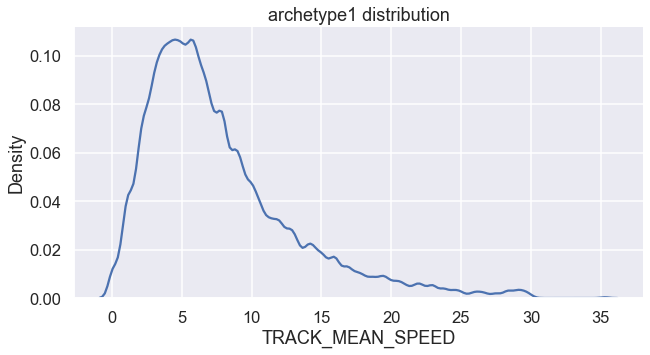

In [11]:
sns.displot(archetype1_df['TRACK_MEAN_SPEED'], kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='archetype1 distribution')

In [15]:
archetype2_df = df[df.cell_line.isin(archetype2_list)]
archetype2_df = archetype2_df.reset_index(drop=True)
archetype2_df['archetype'] = 2
archetype2_df


,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line,archetype
0,PRF5_B3_pickup,Track_0,0,12,0,0,0,0,0,11,...,1.000,10.000,9.781,0.093,0.123,0.059,0.100,0.017,PRF5,2
1,PRF5_B3_pickup,Track_1,1,10,0,0,0,0,0,9,...,0.000,1.000,0.928,0.087,0.116,0.040,0.094,0.023,PRF5,2
2,PRF5_B3_pickup,Track_2,2,3,0,0,0,0,0,2,...,2.000,4.000,1.414,0.067,0.075,0.056,0.070,0.008,PRF5,2
3,PRF5_B3_pickup,Track_3,3,7,0,0,0,0,0,6,...,2.459,6.725,3.562,0.096,0.100,0.094,0.096,0.002,PRF5,2
4,PRF5_B3_pickup,Track_4,4,3,0,0,0,0,0,2,...,7.837,15.758,5.601,0.075,0.080,0.071,0.073,0.004,PRF5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15314,Kami41_B6_pickup,Track_506,506,2,0,0,0,0,0,1,...,6.169,6.169,NaN,0.109,0.114,0.104,0.114,0.005,Kami41,2
15315,Kami41_B6_pickup,Track_507,507,2,0,0,0,0,0,1,...,13.190,13.190,NaN,0.108,0.113,0.103,0.113,0.005,Kami41,2
15316,Kami41_B6_pickup,Track_508,508,2,0,0,0,0,0,1,...,3.692,3.692,NaN,0.110,0.113,0.108,0.113,0.003,Kami41,2
15317,Kami41_B6_pickup,Track_509,509,3,0,0,0,0,0,2,...,3.999,6.192,1.550,0.107,0.115,0.102,0.105,0.006,Kami41,2


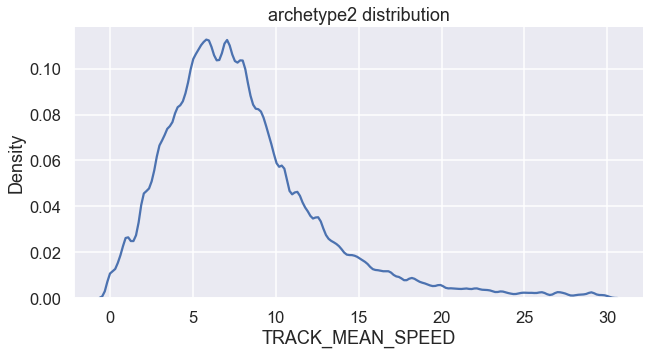

In [13]:
sns.displot(archetype2_df['TRACK_MEAN_SPEED'], kind="kde", bw_adjust=.3, 
            height=5, aspect=15/8).set(title='archetype2 distribution')

In [18]:
archetype_df = pd.concat([archetype1_df, archetype2_df])
archetype_df = archetype_df.reset_index(drop=True)
archetype_df

,IMAGE_SERIES,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,...,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,cell_line,archetype
0,JHH4_B2,Track_0,0,39,2,1,0,0,0,40,...,0.000,4.500,4.901,0.133,0.145,0.103,0.134,0.010,JHH4,1
1,JHH4_B2,Track_1,1,25,0,0,0,0,0,24,...,1.746,7.375,5.990,0.132,0.144,0.109,0.131,0.009,JHH4,1
2,JHH4_B2,Track_2,2,12,0,0,0,0,0,11,...,1.246,6.963,9.102,0.128,0.136,0.119,0.129,0.006,JHH4,1
3,JHH4_B2,Track_3,3,14,1,1,0,0,0,14,...,3.514,7.040,6.566,0.106,0.113,0.100,0.106,0.004,JHH4,1
4,JHH4_B2,Track_4,4,35,0,0,0,0,0,34,...,0.193,0.948,3.941,0.123,0.138,0.101,0.127,0.011,JHH4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19636,Kami41_B6_pickup,Track_506,506,2,0,0,0,0,0,1,...,6.169,6.169,NaN,0.109,0.114,0.104,0.114,0.005,Kami41,2
19637,Kami41_B6_pickup,Track_507,507,2,0,0,0,0,0,1,...,13.190,13.190,NaN,0.108,0.113,0.103,0.113,0.005,Kami41,2
19638,Kami41_B6_pickup,Track_508,508,2,0,0,0,0,0,1,...,3.692,3.692,NaN,0.110,0.113,0.108,0.113,0.003,Kami41,2
19639,Kami41_B6_pickup,Track_509,509,3,0,0,0,0,0,2,...,3.999,6.192,1.550,0.107,0.115,0.102,0.105,0.006,Kami41,2


In [29]:
# bootstrap archetype 1 values
length = len(archetype_df[archetype_df['archetype'] == 2])
archetype1_tms = archetype_df[archetype_df['archetype'] == 1]['TRACK_MEAN_SPEED']
x = np.random.choice(archetype1_tms, size=length, replace=True)


(15319,)

In [32]:
y = archetype_df[archetype_df['archetype'] == 2]['TRACK_MEAN_SPEED']
print(y.shape)
x.shape


(15319,)


(15319,)

In [36]:
bootstrapped_archetypes = {'archetype 1': x, 'archetype 2': y}
bootstrapped_archetypes_df = pd.DataFrame.from_dict(bootstrapped_archetypes)
bootstrapped_archetypes_df

,archetype 1,archetype 2
4322,3.599,12.539
4323,7.499,1.111
4324,11.000,3.000
4325,9.267,6.816
4326,17.687,11.798
...,...,...
19636,13.597,6.169
19637,8.629,13.190
19638,25.663,3.692
19639,19.316,5.095


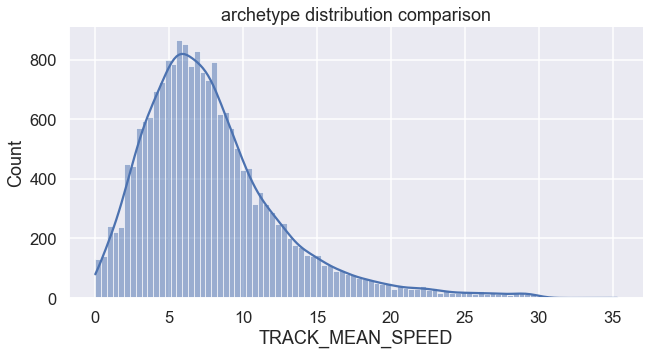

In [42]:
sns.displot(data=archetype_df, x='TRACK_MEAN_SPEED', kde=True, fill=True, 
            height=5, aspect=15/8).set(title='archetype distribution comparison')

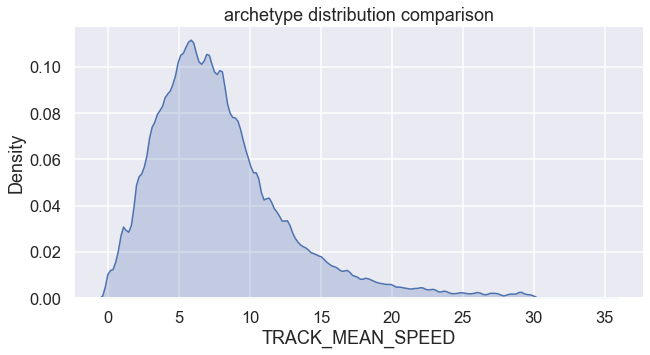

In [45]:
sns.displot(data=archetype_df, x='TRACK_MEAN_SPEED', kind="kde", bw_adjust=.3, fill=True, 
            height=5, aspect=15/8).set(title='archetype distribution comparison')

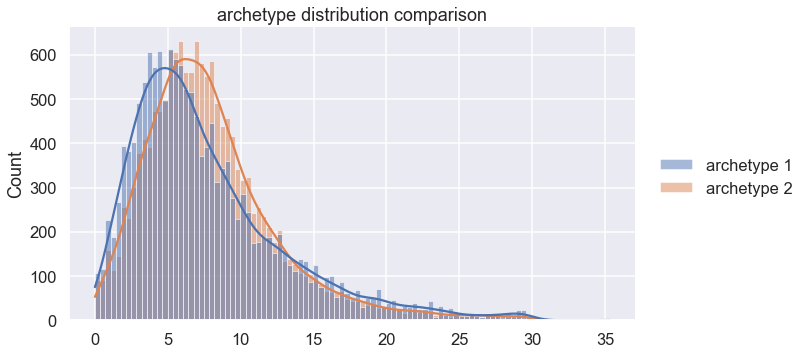

In [40]:
sns.displot(data=bootstrapped_archetypes_df, kde=True, fill=True, 
            height=5, aspect=15/8).set(title='archetype distribution comparison')

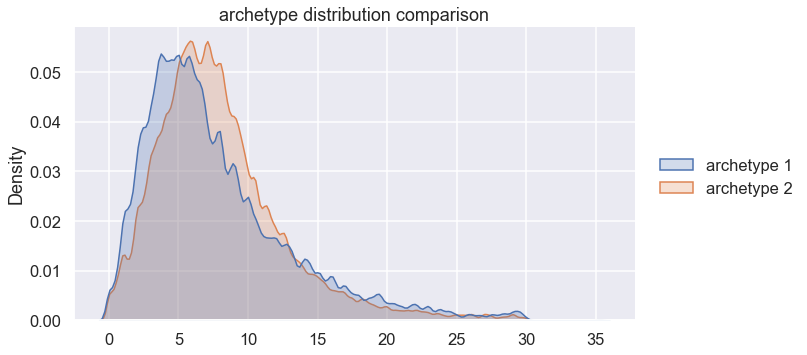

In [41]:
sns.displot(data=bootstrapped_archetypes_df, kind="kde", bw_adjust=.3, fill=True, 
            height=5, aspect=15/8).set(title='archetype distribution comparison')